In [1]:
from matplotlib import pyplot as plt
import numpy as np


In [45]:
figsize=(18, 10)
relevants = [
    (120, 'Hochwasser an der Elbe 2006'),
    (220, 'Starkregen Berlin 2006'),
    (550, 'Starkregen und Rekordhochwasser in NRW 2007'),
    (1300, 'Hochwasser in Mitteleuropa 2009'),
    (1678, 'Starkniederschläge im Dreiländereck Polen, Tschechien, Deutschland 2010'),
    (2700, 'Hochwasser in Mitteleuropa 2013'),
    (3128, 'Unwetter im Münsterland 2014'),
    (3800, 'Überflutungen im Saarland'),
    (4200, 'Hochwasser im Harz und Harzvorland 2017'),
    (5640, 'Flutkatastrophe 2021'),
    (6408, 'Tief "Lambert" 2023'),
    (6540, 'Hochwasser nach Starkregen in Norddeutschland 2023'),
]

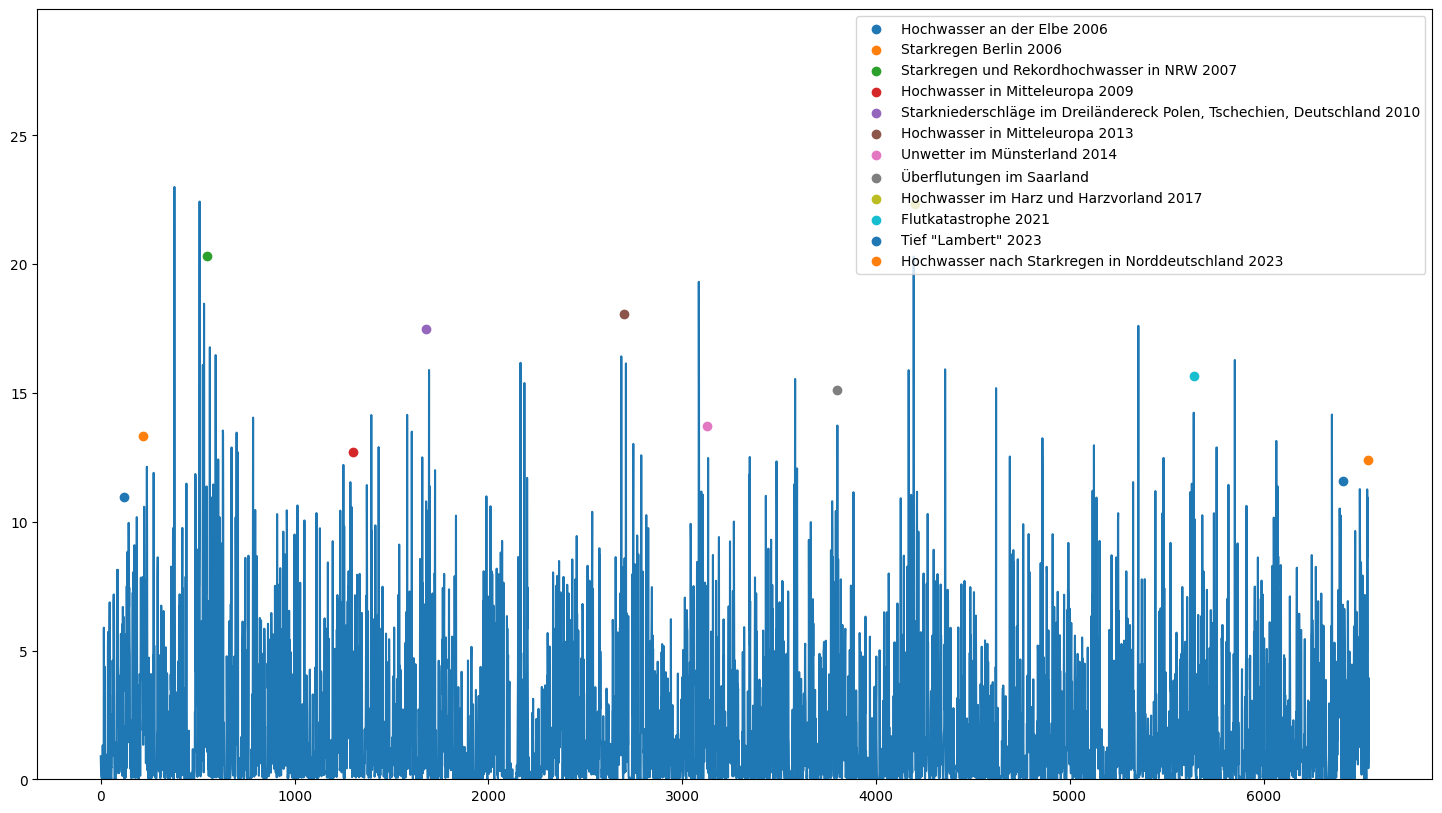

In [46]:
data = np.load('daily_precipitation_area_mean.npy')
fig = plt.figure(figsize=figsize)
plt.plot(data)
for r, l in relevants:
    plt.scatter(r, data[r-30:r+30].max()*1.1, label=l)
plt.legend()
plt.ylim(0, data.max()*1.3)
plt.show()

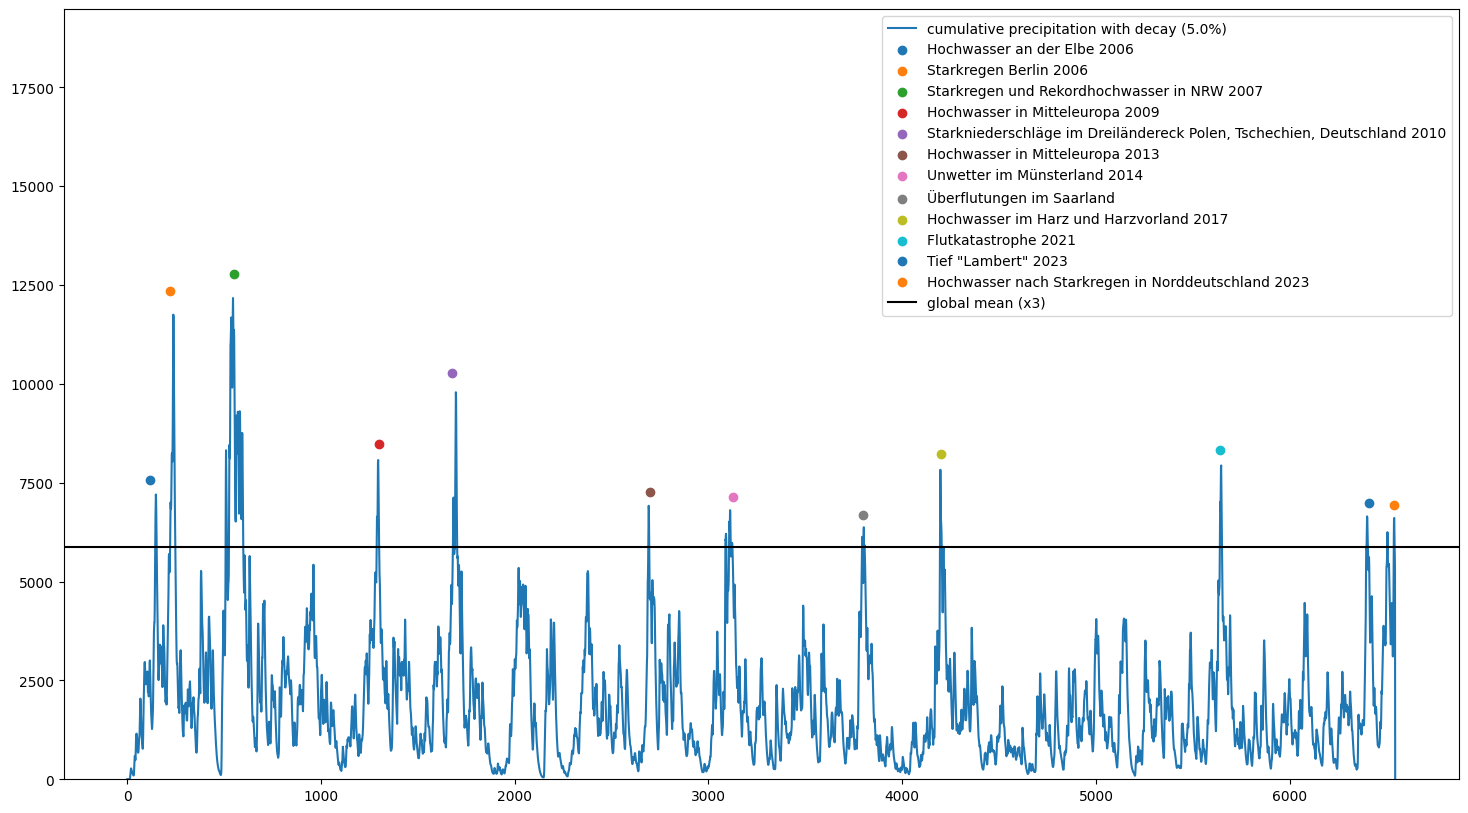

In [54]:
decay = 0.95

tmp = np.zeros_like(data)
for i in range(1, len(tmp)):
    tmp[i] = tmp[i-1] * decay + data[i]

# blur tmp
tmp_blurred = np.zeros_like(tmp)
for i in range(1, len(tmp)-1):
    tmp_blurred[i] = (tmp[i-1]+tmp[i]+tmp[i+1])/3

tmp_blurred = tmp_blurred**2

fig = plt.figure(figsize=figsize)
plt.plot(tmp_blurred, label=f'cumulative precipitation with decay ({100-decay*100}%)')
for r, l in relevants:
    plt.scatter(r, tmp_blurred[r-30:r+30].max()*1.05, label=l)

# add moving average
#N = 750
#ma = np.convolve(tmp_blurred, np.ones(N)/N, mode='valid')
#ma *= 3.2
#plt.plot(ma, label=f'running mean ({N})')

# plot global mean
plt.axhline(tmp_blurred.mean()*3, color='black', label='global mean (x3)')


plt.legend()
plt.ylim(0, tmp_blurred.max()*1.6)
#plt.xlim(5000,6000) # zoom on Flutkatastrophe 2021
plt.show()